RAneem mousa 202200389 FXGBoost + 5 XAI  (shap , pdp ,lime ,Permutation importance,ROCCURVE )

In [5]:
!pip install xlearn scikit-learn pandas shap lime


In [6]:
!pip install lime


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTENC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import shap
import lime
import lime.lime_tabular
from sklearn.datasets import make_classification
import pandas as pd
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve





PREPROCING

In [7]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


In [8]:
df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

In [9]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [10]:
test_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9,13.27,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4,12.27,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,5,11.27,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,1,5.42,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [11]:
df.shape,
test_df.shape

(50000, 27)

In [12]:
df.shape,df


((100000, 28),
             ID Customer_ID     Month           Name   Age          SSN  \
 0       0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265   
 1       0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265   
 2       0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265   
 3       0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265   
 4       0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265   
 ...        ...         ...       ...            ...   ...          ...   
 99995  0x25fe9  CUS_0x942c     April          Nicks    25  078-73-5990   
 99996  0x25fea  CUS_0x942c       May          Nicks    25  078-73-5990   
 99997  0x25feb  CUS_0x942c      June          Nicks    25  078-73-5990   
 99998  0x25fec  CUS_0x942c      July          Nicks    25  078-73-5990   
 99999  0x25fed  CUS_0x942c    August          Nicks    25  078-73-5990   
 
       Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
 0    

In [13]:
test_df.shape,test_df

((50000, 27),
             ID Customer_ID      Month             Name   Age          SSN  \
 0       0x160a   CUS_0xd40  September    Aaron Maashoh    23  821-00-0265   
 1       0x160b   CUS_0xd40    October    Aaron Maashoh    24  821-00-0265   
 2       0x160c   CUS_0xd40   November    Aaron Maashoh    24  821-00-0265   
 3       0x160d   CUS_0xd40   December    Aaron Maashoh   24_  821-00-0265   
 4       0x1616  CUS_0x21b1  September  Rick Rothackerj    28  004-07-5839   
 ...        ...         ...        ...              ...   ...          ...   
 49995  0x25fe5  CUS_0x8600   December   Sarah McBridec  4975  031-35-0942   
 49996  0x25fee  CUS_0x942c  September            Nicks    25  078-73-5990   
 49997  0x25fef  CUS_0x942c    October            Nicks    25  078-73-5990   
 49998  0x25ff0  CUS_0x942c   November            Nicks    25  078-73-5990   
 49999  0x25ff1  CUS_0x942c   December            Nicks    25  078-73-5990   
 
       Occupation Annual_Income  Monthly_Inhand_

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [15]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [16]:
df.isnull().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,9985
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,15002
Num_Bank_Accounts,0


In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df.nunique()

,0
ID,100000
Customer_ID,12500
Month,8
Name,10139
Age,1788
SSN,12501
Occupation,16
Annual_Income,18940
Monthly_Inhand_Salary,13235
Num_Bank_Accounts,943


In [19]:
df.dtypes

,0
ID,object
Customer_ID,object
Month,object
Name,object
Age,object
SSN,object
Occupation,object
Annual_Income,object
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,int64


In [20]:
df.dropna(inplace=True)

In [21]:
df.fillna(df.mean(numeric_only=True), inplace=True)


In [22]:
print(df['Credit_Score'].value_counts())


Credit_Score
Standard    27951
Poor        16516
Good         8582
Name: count, dtype: int64


Handle Imbalance with SMOTENC



In [23]:
# cat_cols = X.select_dtypes(include=['int', 'object']).columns.tolist()
# cat_indices = [i for i, col in enumerate(X.columns) if col in cat_cols]


In [25]:
print(df.columns.tolist())

['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score']


#EDA

Visualizing class distribution


Target Distribution

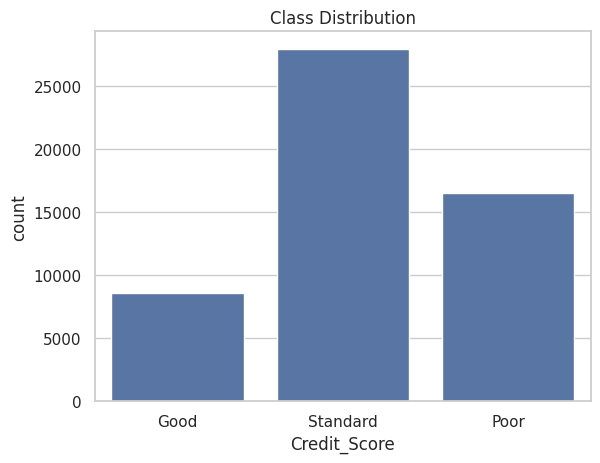

In [26]:
sns.countplot(data=df, x='Credit_Score')
plt.title("Class Distribution")
plt.show()

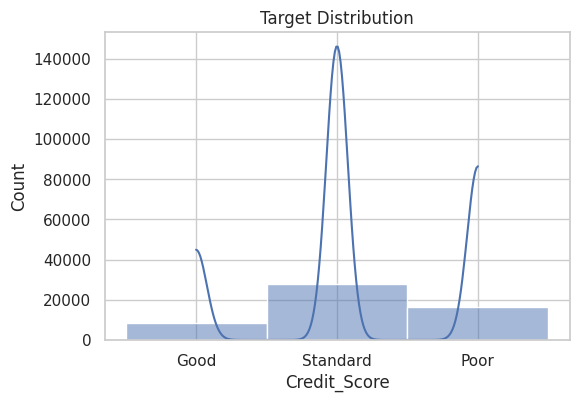

In [27]:
plt.figure(figsize=(6,4))
sns.histplot(df["Credit_Score"], kde=True)
plt.title("Target Distribution")
plt.show()

Histogram of numeric columns


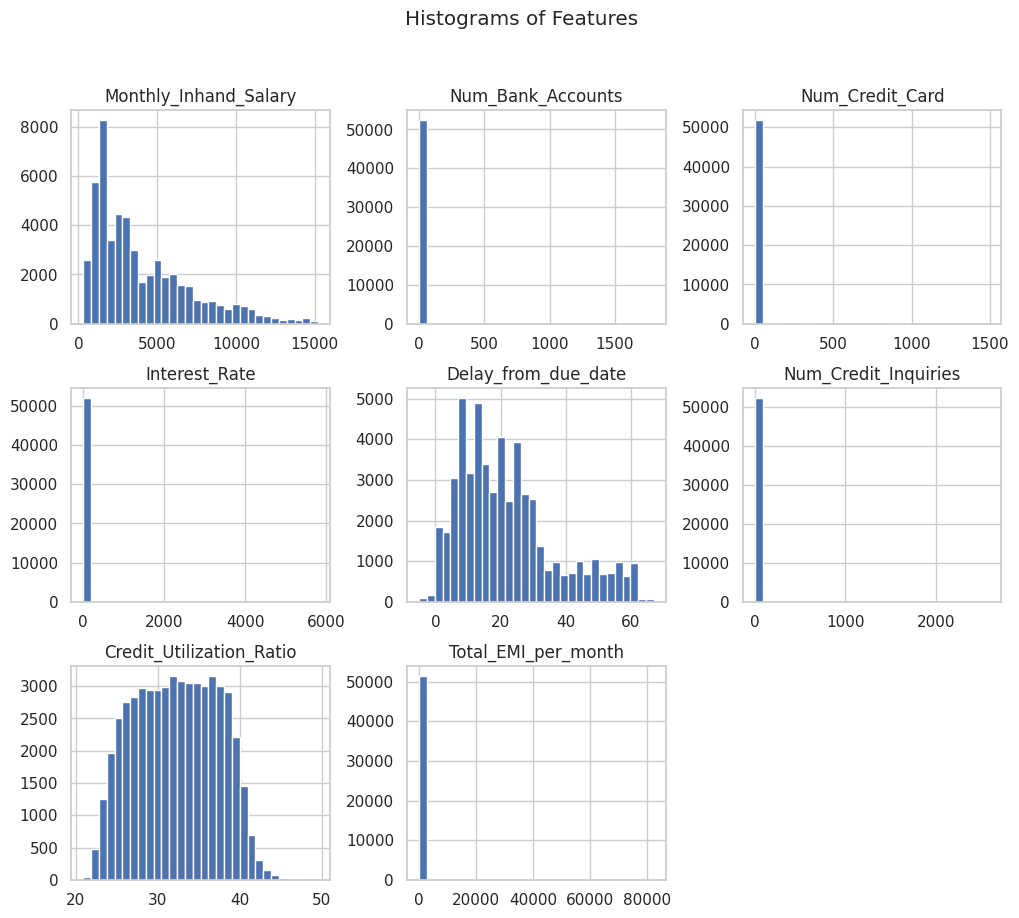

In [28]:
df.hist(figsize=(12, 10), bins=30)
plt.suptitle("Histograms of Features")
plt.show()


Correlation heatmap

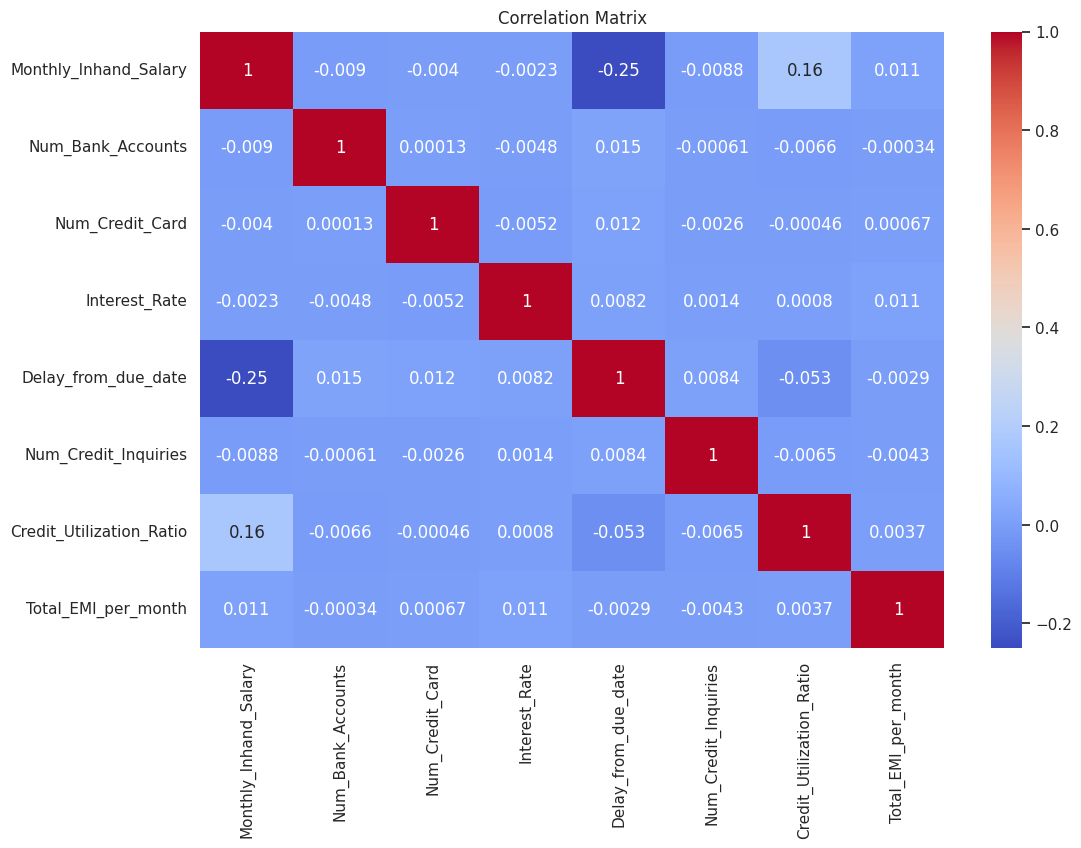

In [29]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()



Boxplots


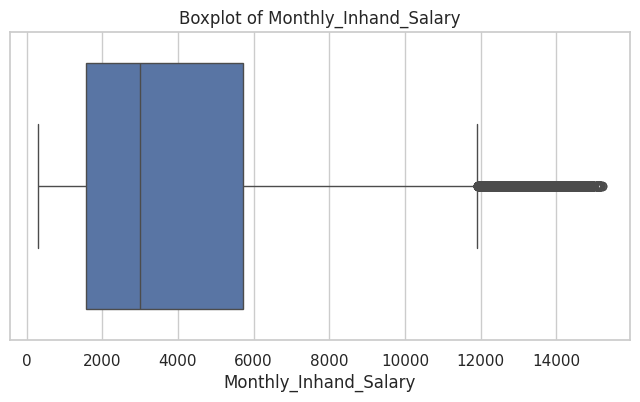

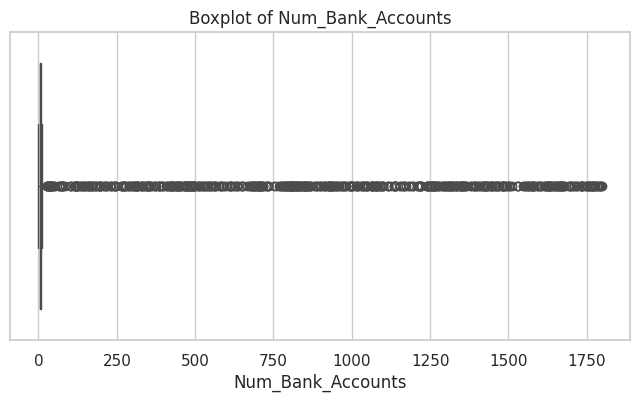

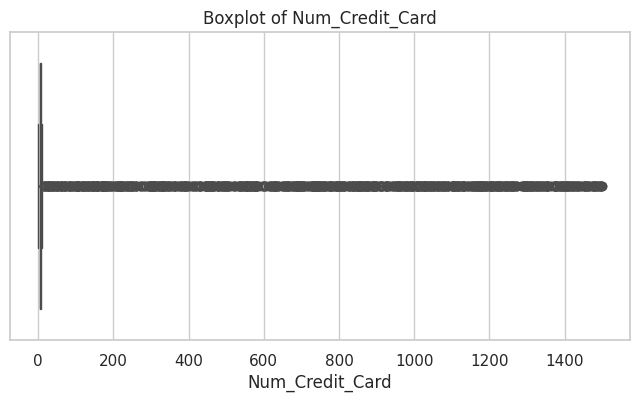

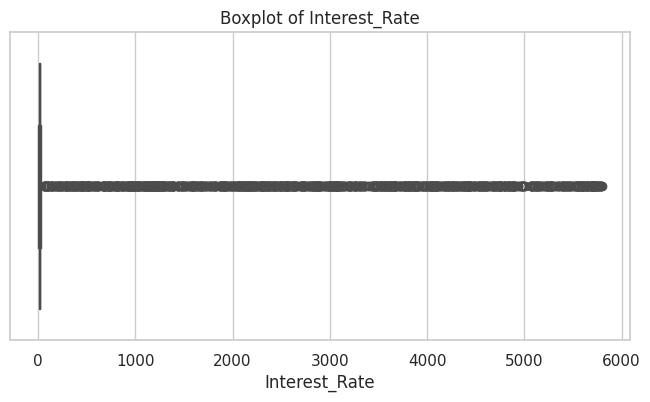

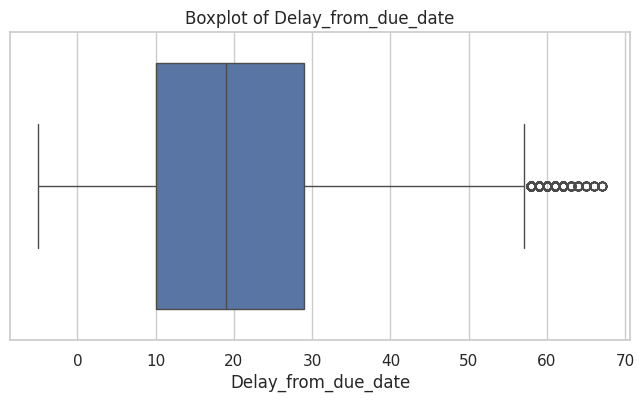

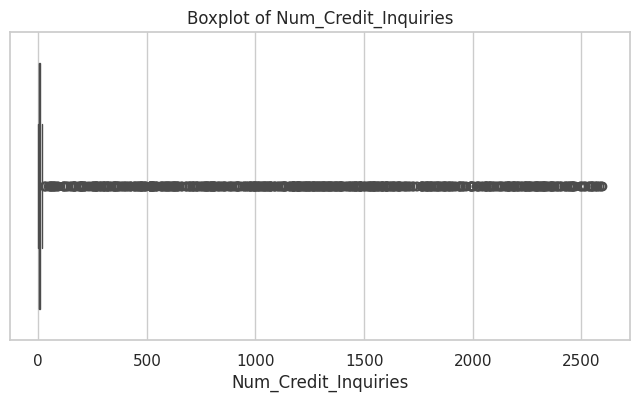

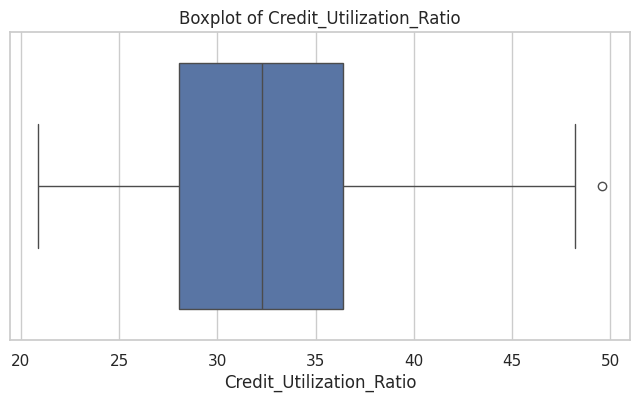

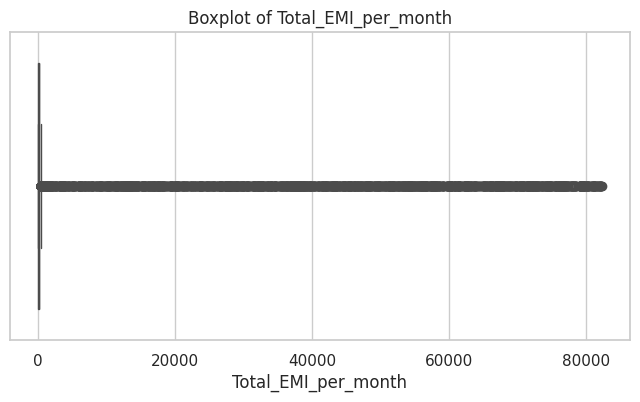

In [30]:
for col in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


Pairplot for feature relationships


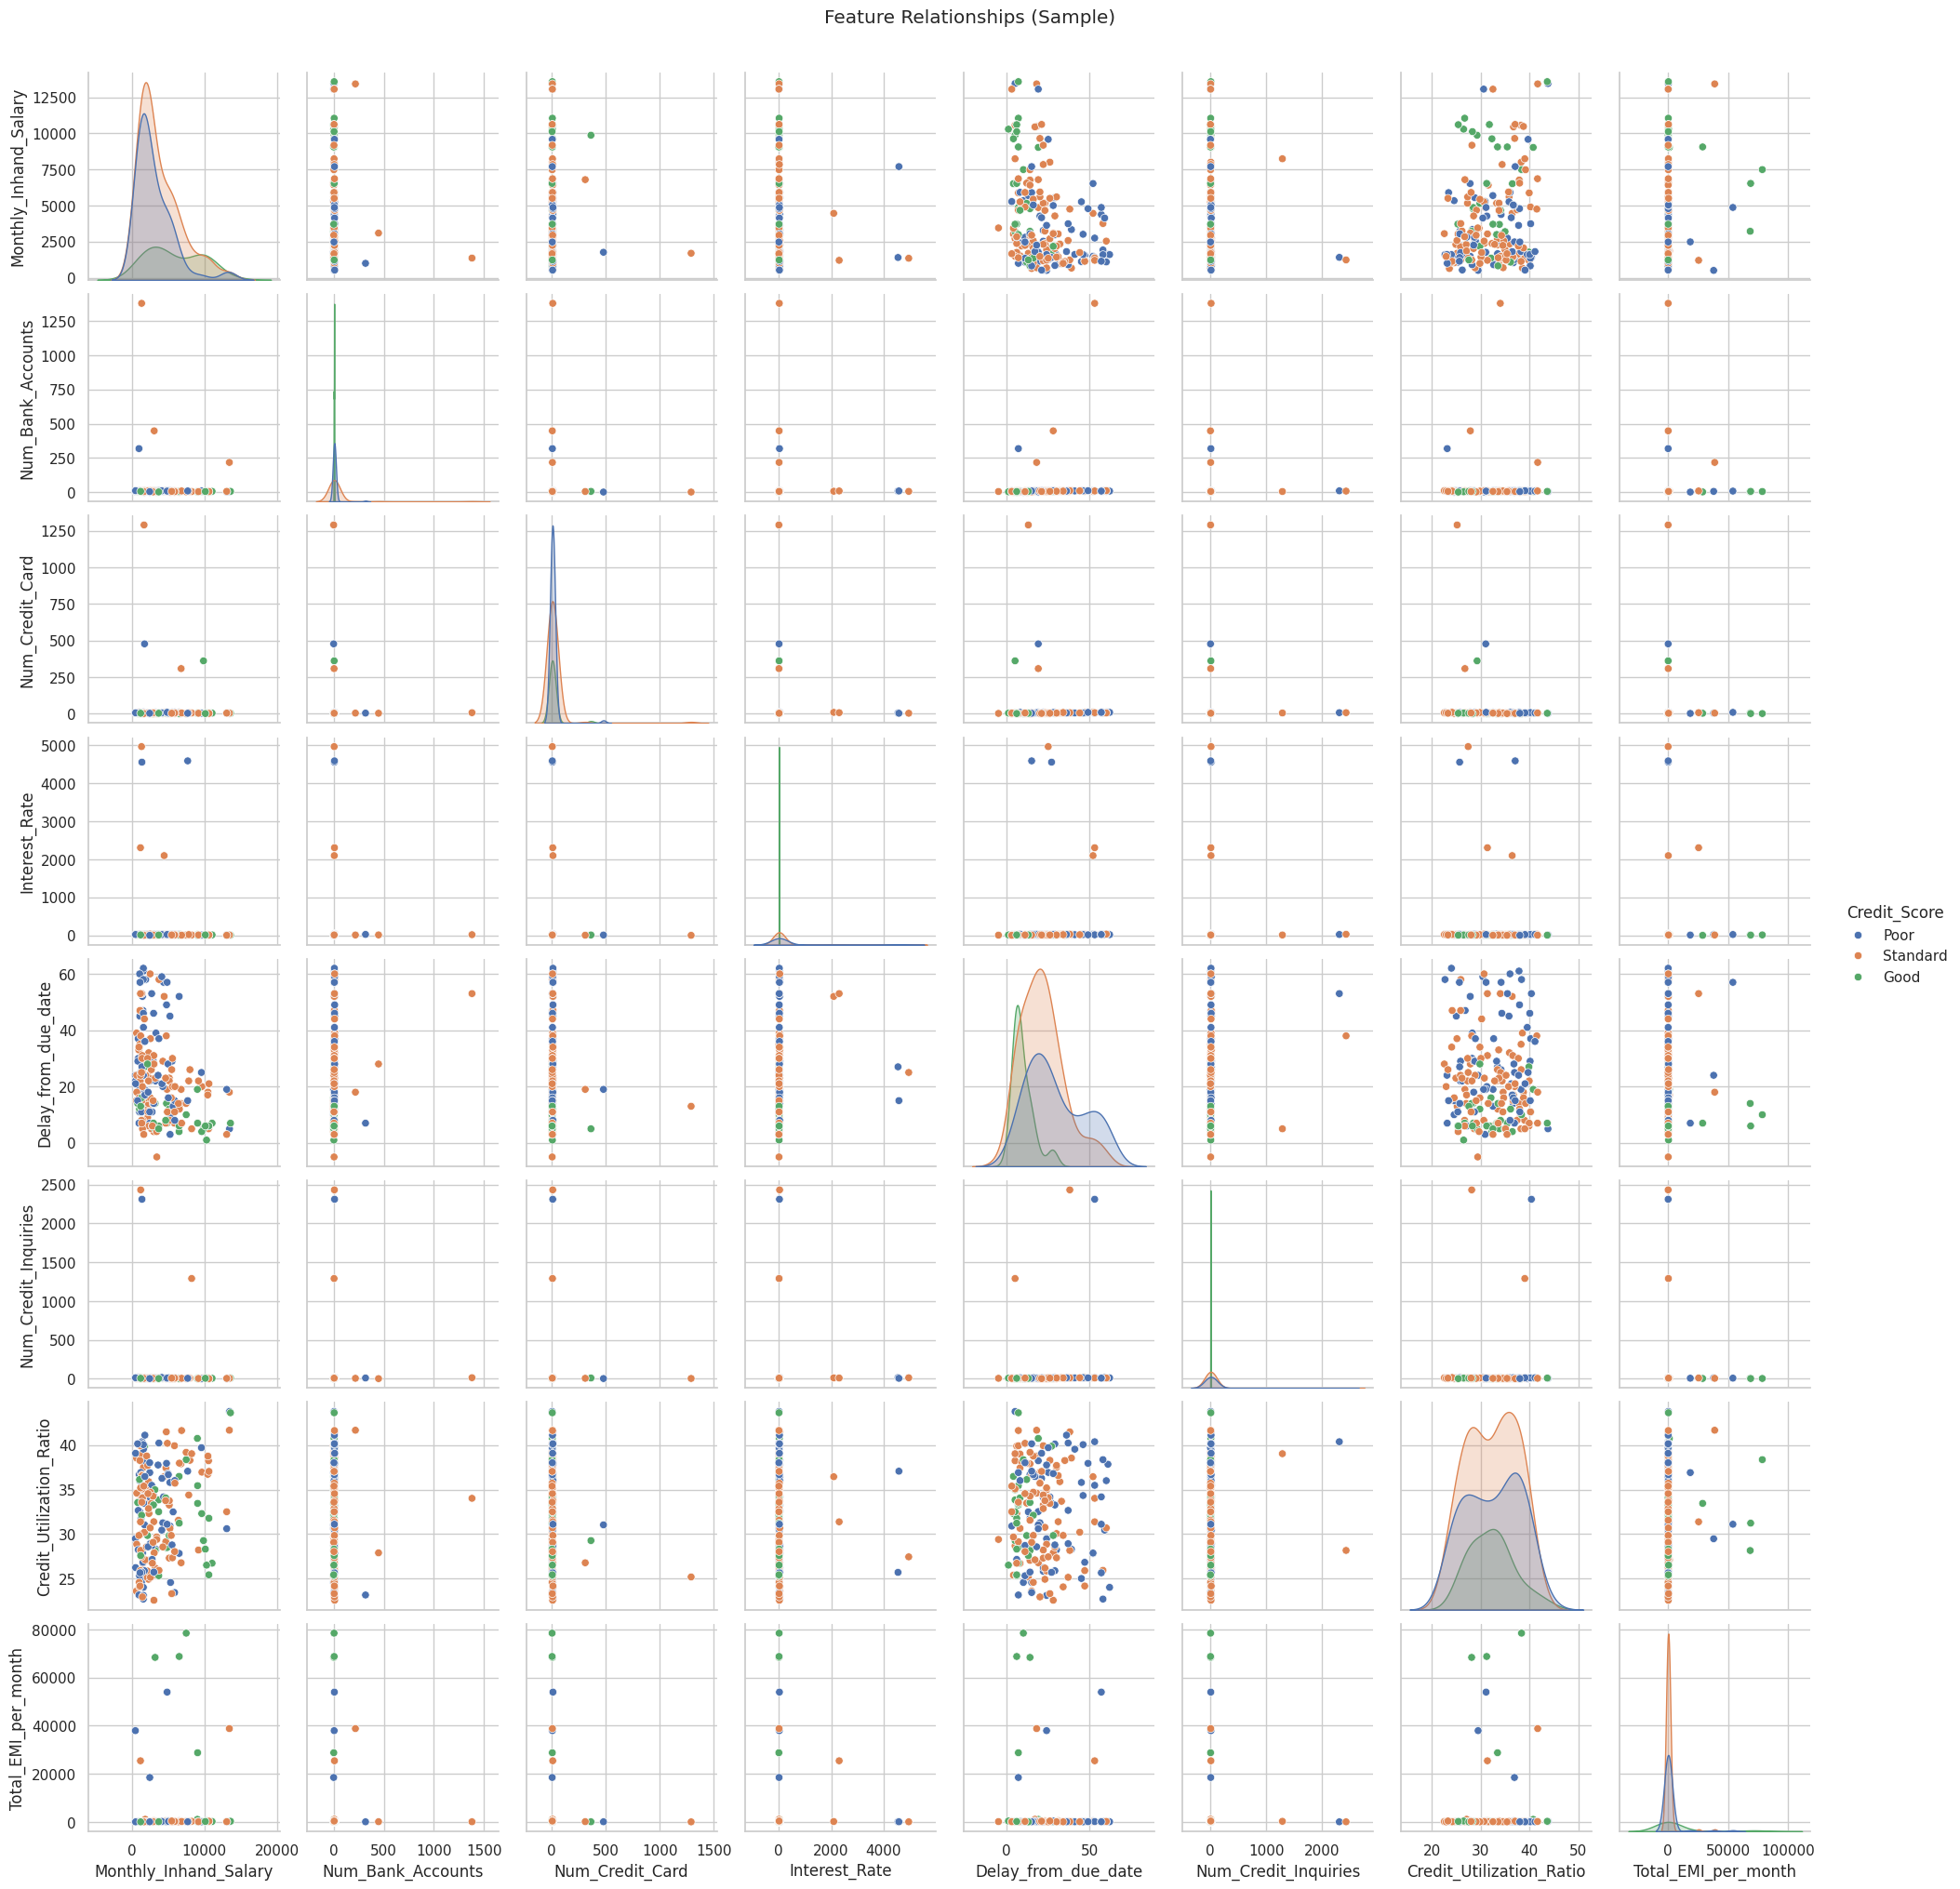

In [31]:
sns.pairplot(df.sample(n=min(200, len(df))), hue="Credit_Score")
plt.suptitle("Feature Relationships (Sample)", y=1.02)
plt.show()


# Encode categorical features if any


Label Encoding

In [33]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype(str)
    df[col] = LabelEncoder().fit_transform(df[col])

eatures and target

In [34]:
X = df.drop("Credit_Score", axis=1)
y = df["Credit_Score"]


Scale

In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



 Split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


#XGBoost

In [37]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [43]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

Evaluation

In [44]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(" Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[1188   26  522]
 [  72 2432  847]
 [ 411  691 4421]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.68      0.70      1736
           1       0.77      0.73      0.75      3351
           2       0.76      0.80      0.78      5523

    accuracy                           0.76     10610
   macro avg       0.75      0.74      0.74     10610
weighted avg       0.76      0.76      0.76     10610




 ROC AUC score


In [47]:
from sklearn.preprocessing import label_binarize  # Import label_binarize
roc_auc = roc_auc_score(label_binarize(y_test, classes=np.unique(y)), y_proba, multi_class='ovr')
print("ROC AUC Score:", roc_auc)


ROC AUC Score: 0.8964336472968948


 ROC Curve

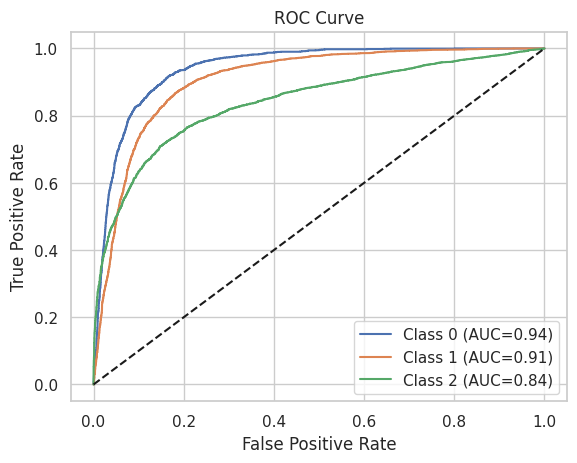

In [48]:
y_test_bin = label_binarize(y_test, classes=np.unique(y))
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    auc = roc_auc_score(y_test_bin[:, i], y_proba[:, i])
    plt.plot(fpr, tpr, label=f"Class {i} (AUC={auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


# Permutation importance plot


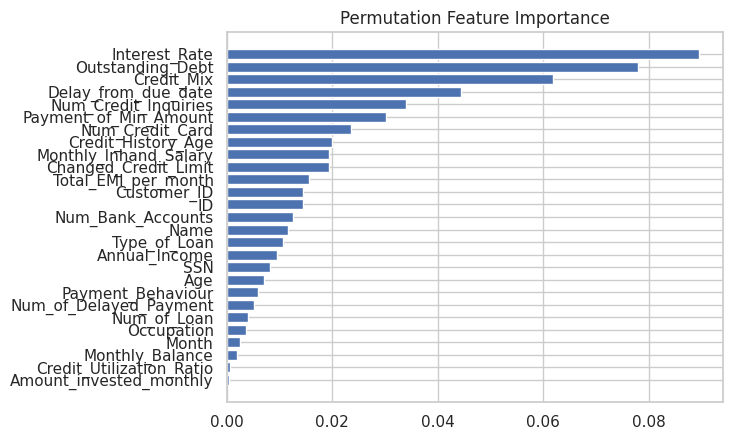

In [49]:
perm = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=0)
sorted_idx = perm.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm.importances_mean[sorted_idx])
plt.title("Permutation Feature Importance")
plt.show()


Partial Dependence Plots fortop 3 features


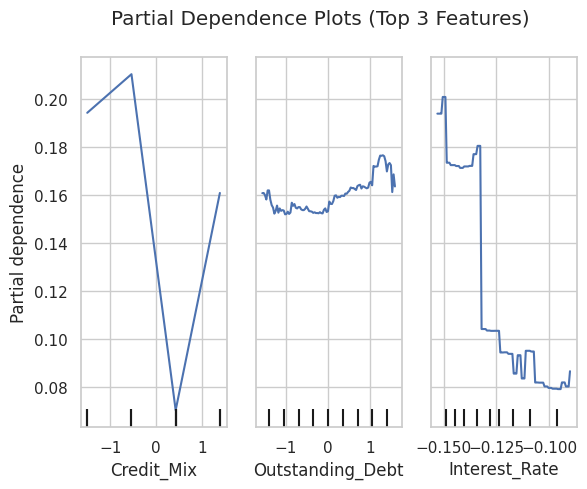

In [54]:
from sklearn.inspection import PartialDependenceDisplay

top_features = sorted_idx[-3:]
#for the first class (index 0)
PartialDependenceDisplay.from_estimator(model, X_test, features=top_features, feature_names=X.columns, target=0)
plt.suptitle("Partial Dependence Plots (Top 3 Features)")
plt.show()

SHAP (Global + Local)

# SHAP plot


<Figure size 640x480 with 0 Axes>

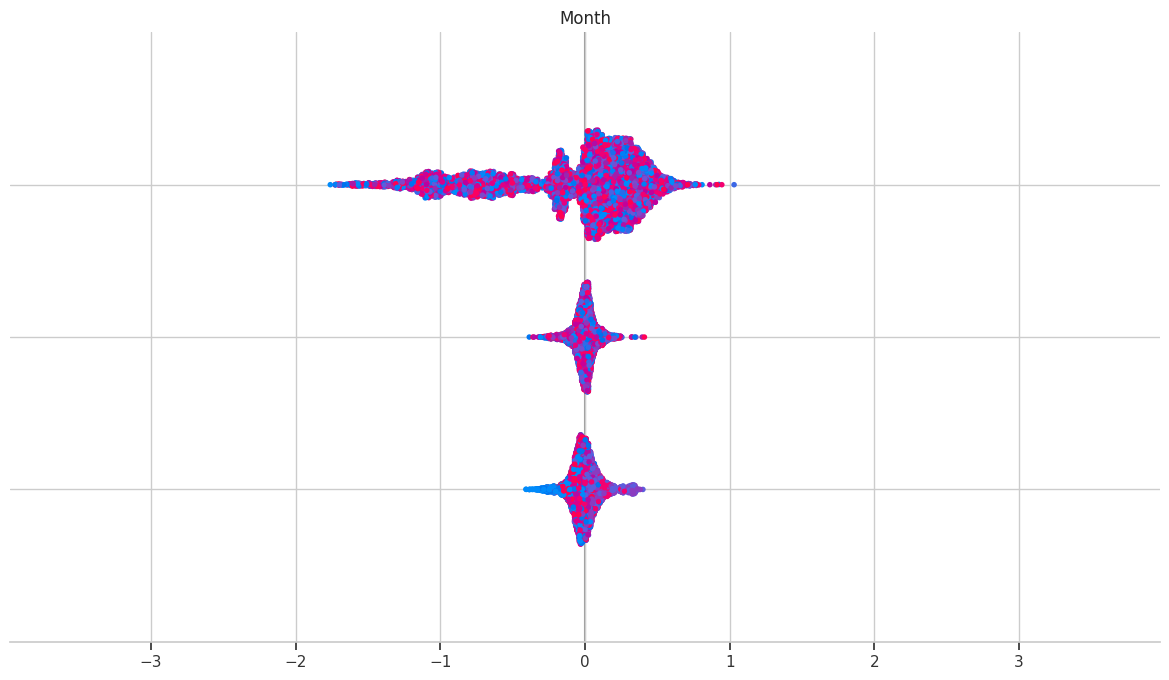

In [55]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

SHAP waterfall plot for the first prediction

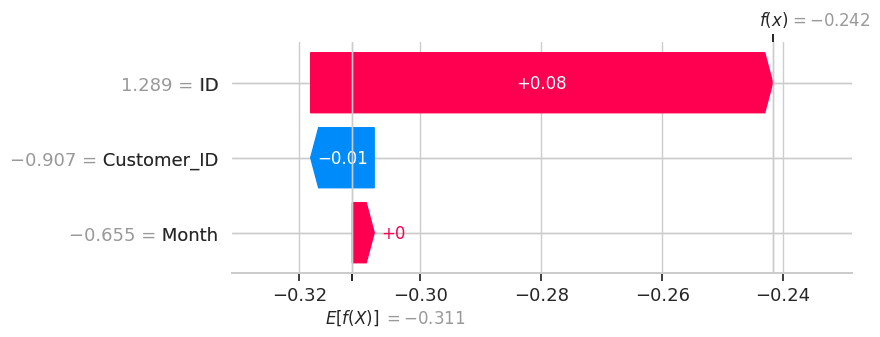

In [60]:
shap.plots.waterfall(shap.Explanation(
    values=shap_values[0][0],
    base_values=explainer.expected_value[0],
    data=X_test[0],
    feature_names=X.columns
))

# LIME


In [62]:
lime_exp = lime.lime_tabular.LimeTabularExplainer(X_train, # Remove .values
    feature_names=X.columns.tolist(),
    class_names=["Poor", "Fair", "Good"],
    discretize_continuous=True)

explanation = lime_exp.explain_instance(X_test[0], model.predict_proba, num_features=5) # Change X_test.iloc[0].values to X_test[0]
explanation.show_in_notebook(show_table=True)

REFRANCE
https://link.springer.com/chapter/10.1007/978-3-031-48465-0_2